In [23]:
%matplotlib inline
import sys, os, time
import rasterio as rio
import rasterio.mask as masker
import rasterio.plot as rplt
import shapefile as shp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
def plot_shape(shape):
    figsize = (10,6)
    sns.set(style="whitegrid", palette="pastel", color_codes=True)
    sns.mpl.rc("figure", figsize=figsize)
    plt.figure(figsize = figsize)
    x = [i[0] for i in biggest.points]
    y = [i[1] for i in biggest.points]
    plt.plot(x, y, 'k')
    plt.show()

In [2]:
landsatTileList = r"/home/dsa/DSA/images/scene_list.txt"
landsatDirectory = r"/home/dsa/DSA/images/LC08_L1GT_209117_20140101_20170427_01_T2"
coastMaskShpfile = r"/home/dsa/DSA/vectors/Coastline_high_res_polygon_v7.1.shp"

outputDirectory = r"/home/dsa/DSA/vectors/"
outputFileExt = r"_burjo_output.tif"

assert os.path.isfile(landsatTileList)
assert os.path.isdir(landsatDirectory)
assert os.path.isfile(coastMaskShpfile)

In [3]:
tiles = open(landsatTileList).read().splitlines()
print(tiles)

['LC08_L1GT_209117_20140101_20170427_01_T2']


In [4]:
startTime = time.ctime()

In [5]:
print("ArcPy Rock masking script started: %s" % startTime)

ArcPy Rock masking script started: Mon Oct 14 06:39:05 2019


shapefile Reader
    14601 shapes (type 'POLYGON')
    14601 records (3 fields)


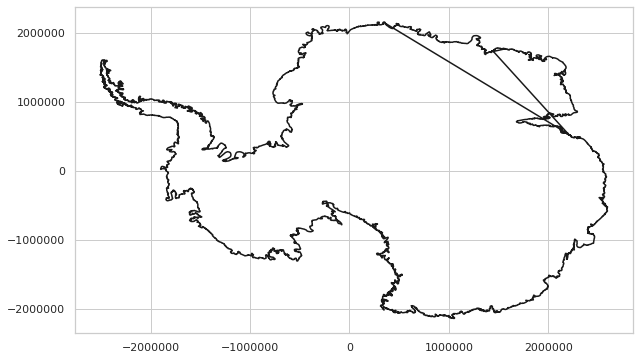

In [21]:
coast = shp.Reader(coastMaskShpfile)
print(coast)

biggest = max(coast.shapes(), key=lambda x: len(x.points))

plot_shape(biggest)

In [22]:
for i in range(len(tiles)):
    
    thisTileID = tiles[i]
    thisTileFile = landsatDirectory + "/" + thisTileID
    outFilename = outputDirectory + "/" + thisTileID
    
    fmt = "\t%d of %d."
    print(fmt % (i + 1, len(tiles)))
    tic = time.time()

	1 of 1.


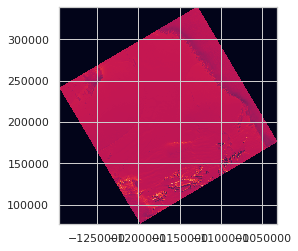

In [25]:
B2 = rio.open(thisTileFile + "_B2.TIF", dtype='float32') # Blue
B3 = rio.open(thisTileFile + "_B3.TIF", dtype='float32') # Green
B5 = rio.open(thisTileFile + "_B5.TIF", dtype='float32') # NIR
B6 = rio.open(thisTileFile + "_B6.TIF", dtype='float32') # SWIR1
B10 = rio.open(thisTileFile + "_B10.TIF", dtype='float32') # TIRS1
rplt.show(B2)